# Springboard Capstone Two - Data Wrangling by Anush Sridharan
## Title : Stroke Prediction                                                                                    


In this notebook we will be performing data wrangling of the stroke dataset to understand the different features, data types and structure of the dataset to prepare the data for future modelling. 

**Data sources**: This data  is  sourced from the Stroke Prediction Dataset from Kaggle.  This dataset contains 12  patient attributes and  just over 5000 observations that can be used  to develop a model for assessment of stroke probability. Link to dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)



In [1]:
# Importing libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the stroke dataset from local folder
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# Reviewing the first few rows of the dataset to get a feel for the different attributes.
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# Overview of the dataset features and the data types of each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Looks like we have a mix of data types, including some string, int and float. Additionally we have some missing values in the 'bmi' column.

In [5]:
#counting number of missing values in each feature
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

About 201 missing values in the 'bmi' column. All others seem to be complete upon preliminary review

Let us look at the different types categorical values in each categorical column.

In [6]:
# Here we can get a general overview of the data. Since hypertension, heart disease and stroke are coded as 0 and 1
# we do not get any meaningful information from those columns. We can see that age distribution is quite large and 
# there appears to be a person under 1 year old.
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
for i in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
         'stroke']:
    print(str(i) + ' : ' + str(df[i].unique()))

gender : ['Male' 'Female' 'Other']
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke : [1 0]


Categorical variables seem to be following specific categories and don't seem to have any incorrect values. There seems to be an 'Unknown' observation for the 'smoking_status' feature which will need to look into to figure out what is going on. 

To starts, let us focus on the missing values in the bmi group. Can we identify any specific groups that are contributing to these missing values, primarily looking at the age and gender. 

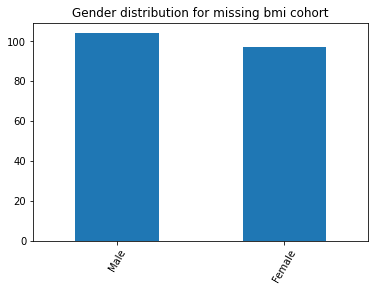

In [8]:
plt.subplots();
df[df.bmi.isnull()==True].gender.value_counts().plot(kind = 'bar');
plt.title('Gender distribution for missing bmi cohort');
plt.xticks(rotation=60);

Missing bmi values seem to be in both sexes. 

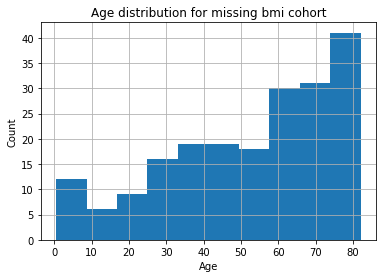

In [9]:
df[df.bmi.isnull()==True].age.hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for missing bmi cohort');

It looks like most of the missing data is from the older patients 60 years or older group. Interestingly there is data from age groups under 10 years as well! How about information about stroke outcomes in this group? Is there value in keeping this group if it is critical for stroke outcomes? 

In [10]:
#Lets look at the stroke distribution for the whole dataset
stroke_per = pd.concat([df.stroke.value_counts(), 100 * (df.stroke.value_counts())/len(df.stroke)],axis=1)
stroke_per.columns = ['counts' , '%']
print(stroke_per)

   counts          %
0    4861  95.127202
1     249   4.872798


Only about 5% of the dataset has stroke as an outcome. 95% of the data contains patient that did not have a stroke. **This is be an imbalanced dataset and we will need to take this into account during modelling.** 

How about the distribution among the patients that have missing bmi. 

In [11]:
#Lets look at the stroke distribution for the missing bmi subgroup
stroke_per_missing = pd.concat([df[df.bmi.isnull()==True].stroke.value_counts(), 100 * (df[df.bmi.isnull()==True].stroke.value_counts())/df.bmi.isnull().sum()],axis=1)
stroke_per_missing.columns = ['counts' , '%']
print(stroke_per_missing)

   counts          %
0     161  80.099502
1      40  19.900498


**About 20% of the missing bmi data has a positive stroke as an outcome! And this is about 16% of all positive stroke outcome data which is a considerable number!** We need to take into consideration whether it would be acceptable to remove all the stroke data from the missing bmi cohort or **if we have to consider estimating the bmi** for these cases in order to keep the valuable stroke data. We will need to revisit this. 

Circling back to the age distribution of this dataset, we noticed that there were individuals under 18 years of age. Let us investigate this further.

In [12]:
#Creating a dataframe for children
df_children = df[df.age < 18]
df_children

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


Looks like there are 856 observations in this dataset. It also seems like several of these cases have smoking_status listed as "Unknown"

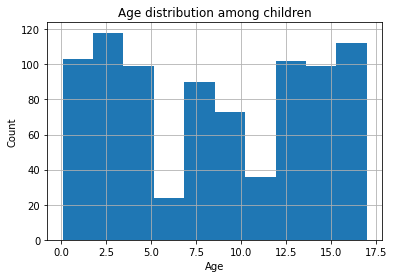

In [13]:
# Creating the age distribution of the children subset
df_children.age.hist();
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Age distribution among children');

For the most part there seems to be an uniform-ish distribution across ages under 18 in this dataset. Next, we will look at the distribution of stroke occurence among children in this dataset. 

/var/folders/n2/3jm0yqh50tqgthxmrbtwhjh40000gn/T/ipykernel_27881/2759337627.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(0,df_children.stroke.value_counts()[0],df_children.stroke.value_counts()[0], ha = 'center',
/var/folders/n2/3jm0yqh50tqgthxmrbtwhjh40000gn/T/ipykernel_27881/2759337627.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(1,df_children.stroke.value_counts()[1],df_children.stroke.value_counts()[1], ha = 'center',


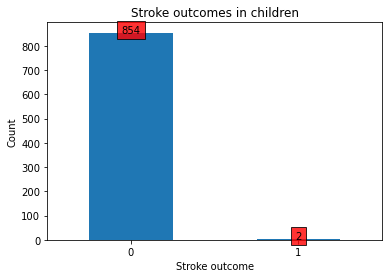

In [14]:
# Generating the distribution of stroke outcomes  among children
df_children.stroke.value_counts().plot(kind = 'bar');
plt.text(0,df_children.stroke.value_counts()[0],df_children.stroke.value_counts()[0], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8));
plt.text(1,df_children.stroke.value_counts()[1],df_children.stroke.value_counts()[1], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8));
plt.xticks(rotation = 0);
plt.xlabel('Stroke outcome');
plt.ylabel('Count');
plt.title('Stroke outcomes in children');

There are only 2 cases of stroke in the children group. Based on this dataset the likelihood of occurence of stroke in children seems extremely low. 

In [15]:
df_children.work_type.value_counts()

children         687
Private          134
Never_worked      17
Self-employed     12
Govt_job           6
Name: work_type, dtype: int64

The work_type for children group is a little odd, considering they are all children. It is unclear what the difference between "children" and "private" is but we will not alter this for now. 

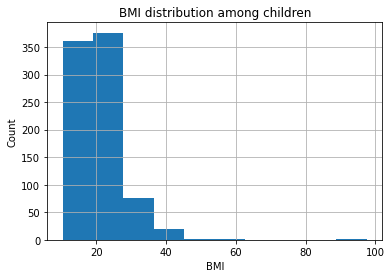

In [16]:
df_children.bmi.hist();
plt.xlabel('BMI');
plt.ylabel('Count');
plt.title('BMI distribution among children');

The BMI distribution in children is motly under 40, however there seem to be some very large BMI values here. 

In [17]:
df_children[df_children.bmi > 40]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
306,16371,Female,13.0,0,0,No,children,Urban,75.42,40.1,Unknown,0
672,31145,Female,17.0,0,0,No,Private,Urban,67.81,55.7,never smoked,0
693,51514,Female,13.0,0,0,No,children,Urban,131.51,41.7,never smoked,0
792,50053,Male,17.0,0,0,No,Private,Urban,62.37,41.3,never smoked,0
950,54769,Male,15.0,0,0,No,Private,Urban,57.94,41.7,Unknown,0
1425,1577,Female,17.0,0,0,No,Private,Urban,70.01,43.0,Unknown,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2411,3793,Male,14.0,0,0,No,Private,Urban,79.36,48.8,never smoked,0
2484,34896,Female,17.0,0,0,No,Private,Rural,92.11,43.0,never smoked,0
3196,57274,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0


There seems to be one Male age 17 with a BMI of 97.6. While this does seem like an outlier, this person also has hypertension. This might be information worth keeping since the stroke outcome is 0 and not removing as an outlier. 

The children subgroup has only 2 positive stroke outcomes which is critical information stating that it is mostly unlikely for a person under 18 to have a stroke. While there may be some outliers in the BMI we will keep all information from this subgroup in our analysis.

Let us now investigate the "smoking_status" in the children subset. 

In [18]:
df_children.smoking_status.value_counts()

Unknown            682
never smoked       140
formerly smoked     25
smokes               9
Name: smoking_status, dtype: int64

There are 682 cases of "unknown" smoking status in this group. It is unclear if this related to missing data or that these individuals have never smoked previously. Lets look at the age distribution of the "unknown" smokers.

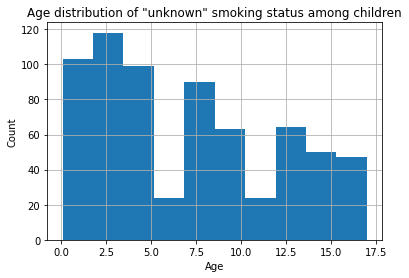

In [19]:
df_children[df_children.smoking_status == 'Unknown'].age.hist();
plt.title('Age distribution of "unknown" smoking status among children');
plt.xlabel('Age');
plt.ylabel('Count');

Looks like the majority of "unknown" smoking status is for children 5 years and younger. How about the age distribution of children in the other smoking_status categories?

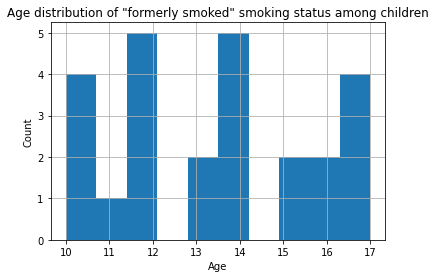

In [20]:
df_children[df_children.smoking_status == 'formerly smoked'].age.hist();
plt.title('Age distribution of "formerly smoked" smoking status among children');
plt.xlabel('Age');
plt.ylabel('Count');

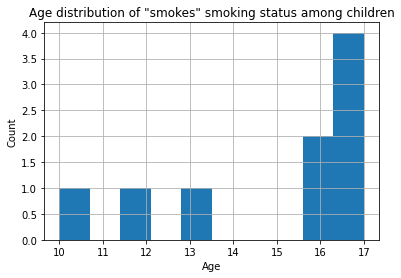

In [21]:
df_children[df_children.smoking_status == 'smokes'].age.hist();
plt.title('Age distribution of "smokes" smoking status among children');
plt.xlabel('Age');
plt.ylabel('Count');

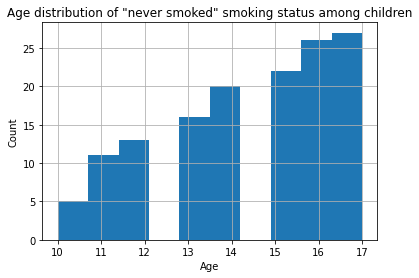

In [22]:
df_children[df_children.smoking_status == 'never smoked'].age.hist(bins=10);
plt.title('Age distribution of "never smoked" smoking status among children');
plt.xlabel('Age');
plt.ylabel('Count');

Based on the distribution of ages among children for the different smoking status categories, we can make an educated guess that the smoking status for children under the age of 10 is most likely "never smoked". We will go ahead and change that in the dataset now. For the cases between ages of 10-18 it is harder to make an educated guess based on the distribution of the other smoking categories. 

In [23]:
df.loc[df['age'] < 10, 'smoking_status'] = 'never smoked'


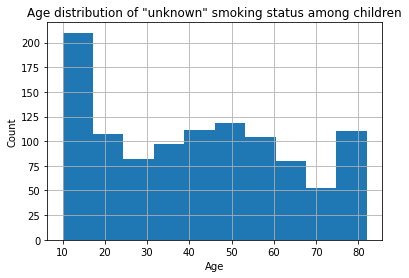

In [24]:
df[df.smoking_status == 'Unknown'].age.hist();
plt.title('Age distribution of "unknown" smoking status among children');
plt.xlabel('Age');
plt.ylabel('Count');

We have now sucessfully removed the 'Unknown' status from children under 10 years of age and replaced with 'never smoked'

Moving our attention back the full dataset let us review the remaining the data for any outliers or missing values and make final preparations for further analysis. 

In [25]:
# Looking at the gender distribution in the dataset 
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [26]:
# There is one observation with a gender noted as 'Other', since we only have one of this kind in the dataset
# we will go ahead and drop it
df[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [27]:
df.drop(3116, inplace=True)

In [28]:
# We have removed the one "Other" gender for purposes of simplification.
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Next we will perfrom 'one-hot encoding' to code the various observations for each of the features

In [29]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [30]:
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


In [31]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   avg_glucose_level               5109 non-null   float64
 5   bmi                             4908 non-null   float64
 6   stroke                          5109 non-null   int64  
 7   gender_Male                     5109 non-null   uint8  
 8   ever_married_Yes                5109 non-null   uint8  
 9   work_type_Never_worked          5109 non-null   uint8  
 10  work_type_Private               5109 non-null   uint8  
 11  work_type_Self-employed         5109 non-null   uint8  
 12  work_type_children              51

We have successfully encoded all the categorical variables. 

We will now drop the "id" column since it is not needed for any further analysis.

In [32]:
df_encoded.drop('id',axis=1,inplace=True)

In [33]:
# Sucessfully confirmed drop of the ID column. 
df_encoded.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


The dataset is now cleaned and ready to be exported for the next step of EDA.

In [34]:
df_encoded.to_csv ('stroke_cleaned.csv')

## Summary
In this notebook we have imported a dataset that contains 5110 observations and 11 columns related to the outcome of having a stroke. This included a mix of categorical and continous features. The % of cases that had stroke was only about 5% while 95% of cases did not have a stroke, leading to the fact that this is an imbalanced dataset. 

Upon further review of the dataset we found that the variable "bmi" contained 201 missing values. However, 40% of those cases with missing "bmi" data had a positive stroke outcome. Therefore removing these missing observations would lead to removing valuable to data and making the dataset further imbalanced. These observations have been left in the dataset as is at this stage and will require some form of imputation prior to modelling. 

Additionally, we found that children (observations where the age was under 18 years) had only 2 cases of stroke out of the total 856 observations. However, a large portion of this subset of observations had "unknown" category for their "smoking_status". Based on the information available within this subset, an educated guess was made to change the "smoking_status" for all children under the age of 10 to "never smoked". 

Next, one observation had their "gender" listed as "Other". Given that this was the only observation of this category, that row was removed the dataset. The "id" column was also dropped. 

Finally, we performed one-hot encoding to make the categorical values for the categorical features into their own columns. The final dataset was exported to the local folder and contained 5109 observations and 16 columns. 